In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

sns.set()
mypalette = sns.color_palette("rocket",7)
sns.set_palette(mypalette)
sns.set_style("white")

# Load and combine dataframes
#### This is super hacky

In [2]:
def flatten_array(liste):
    liste_flatten = [item for sublist in liste for item in sublist]
    return liste_flatten

In [3]:
print(os.getcwd())
d = pd.read_csv('3a_tenrand_lowPMI_pPMI_lag2.csv')
d

#added to adjust for MI thing in original script
lengths = np.array([len(elm.split()) for elm in list(d['stimulus'])])
ppmis = np.array(d['pPMI_lag2'])
new_ppmis =  np.divide(ppmis, lengths)
d['pPMI_lag2'] = new_ppmis
d

/om/user/ckauf/neural-nlp/neural_nlp/analyze/neural-scrambled/metric-validation/add_random_lowPMI_condition


,stimulus_id,condition,stimulus,pPMI_lag2
0,243sentences.0,within_sent_random_lowPMI,habitats conservation encourages the beekeepin...,2.849417
1,243sentences.1,within_sent_random_lowPMI,to produce interest it plants every pollen is ...,2.150667
2,243sentences.2,within_sent_random_lowPMI,that crops agriculture a of for form not way t...,2.762352
3,243sentences.3,within_sent_random_lowPMI,kill also beekeepers the discourage of use cro...,3.108978
4,243sentences.4,within_sent_random_lowPMI,product is go for artisanal but the to craft b...,1.982593
...,...,...,...,...
622,384sentences.379,within_sent_random_lowPMI,multiple to inside windows some have insulatio...,1.812646
623,384sentences.380,within_sent_random_lowPMI,female a a is human adult woman,3.547044
624,384sentences.381,within_sent_random_lowPMI,stereotypically caregiver as is woman a seen a,3.675590
625,384sentences.382,within_sent_random_lowPMI,a pregnant and children can become bear woman,2.988347


In [4]:
data_before = pd.read_csv('/om2/user/ckauf/Mollica2020Stimuli/Calculate_PMI/pPMI_2_6884.csv',header=None)
data_before.columns = ['stimulus_id', 'condition', 'stimulus','pPMI_lag2']
data_before

#added to adjust for MI thing in original script
lengths = np.array([len(elm.split()) for elm in list(data_before['stimulus'])])
ppmis = np.array(data_before['pPMI_lag2'])
new_ppmis =  np.divide(ppmis, lengths)
data_before['pPMI_lag2'] = new_ppmis
data_before

,stimulus_id,condition,stimulus,pPMI_lag2
0,243sentences.0,Original,beekeeping encourages the conservation of loca...,3.887161
1,243sentences.1,Original,it is in every beekeeper's interest to conserv...,4.201707
2,243sentences.2,Original,as a passive form of agriculture it does not r...,4.374406
3,243sentences.3,Original,beekeepers also discourage the use of pesticid...,4.198672
4,243sentences.4,Original,artisanal beekeepers go to extremes for their ...,3.456842
...,...,...,...,...
4384,384sentences.379,random,to graphics long and any beekeepers and is a,1.300451
4385,384sentences.380,random,ripe a after it teflon-clad barrel through,1.559182
4386,384sentences.381,random,a scholarly write patience pharmacists played ...,2.652703
4387,384sentences.382,random,and less others clouds afraid food-scarce and are,1.960286


In [5]:
data_before_upper = data_before.loc[data_before['condition'] != 'random']
data_before_lower = data_before.loc[data_before['condition'] == 'random']

In [6]:
data_before_lower

,stimulus_id,condition,stimulus,pPMI_lag2
3762,243sentences.0,random,to such forces its to solve area,2.492114
3763,243sentences.1,random,can lives infection of with by for let musical...,1.941398
3764,243sentences.2,random,large modern the biggest borrow colors tools m...,3.107513
3765,243sentences.3,random,spikes this screwdriver mysteries may trees an...,1.945071
3766,243sentences.4,random,or a frying or a or red information will jam o...,2.883284
...,...,...,...,...
4384,384sentences.379,random,to graphics long and any beekeepers and is a,1.300451
4385,384sentences.380,random,ripe a after it teflon-clad barrel through,1.559182
4386,384sentences.381,random,a scholarly write patience pharmacists played ...,2.652703
4387,384sentences.382,random,and less others clouds afraid food-scarce and are,1.960286


In [7]:
#Hacky ordering
data = pd.concat([data_before_upper,d,data_before_lower])

# Prepare plotting

In [8]:
ppmi_mean = list()
ppmi_mean_errors = list()

#conditions = np.unique(data['condition'])
#print(conditions)
conditions = ['Original', 'Scr1', 'Scr3', 'Scr5', 'Scr7', 'lowPMI', 'within_sent_random_lowPMI', 'random']
print(len(conditions))
for condition in conditions:
    curr_df = data.loc[data['condition']==condition]
    print(condition)
    print('Mean PPMI: ', np.mean(list(curr_df['pPMI_lag2'])))
    print('STD: ', np.std(list(curr_df['pPMI_lag2'])))
    print('\n')
    ppmi_mean.append(np.mean(list(curr_df['pPMI_lag2'])))
    ppmi_mean_errors.append(np.std(list(curr_df['pPMI_lag2'])))

8
Original
Mean PPMI:  4.474808376656414
STD:  0.9867129091629916


Scr1
Mean PPMI:  4.474973806436001
STD:  0.987890070789749


Scr3
Mean PPMI:  4.492226296899541
STD:  0.9955283106181082


Scr5
Mean PPMI:  4.414344874897777
STD:  0.946962902757798


Scr7
Mean PPMI:  4.286118504587016
STD:  0.9619103883119405


lowPMI
Mean PPMI:  3.1288261878109975
STD:  0.9196857647334185


within_sent_random_lowPMI
Mean PPMI:  2.70709176221617
STD:  0.7809707183794052


random
Mean PPMI:  1.960336761170934
STD:  0.5853975742516182




# Plot

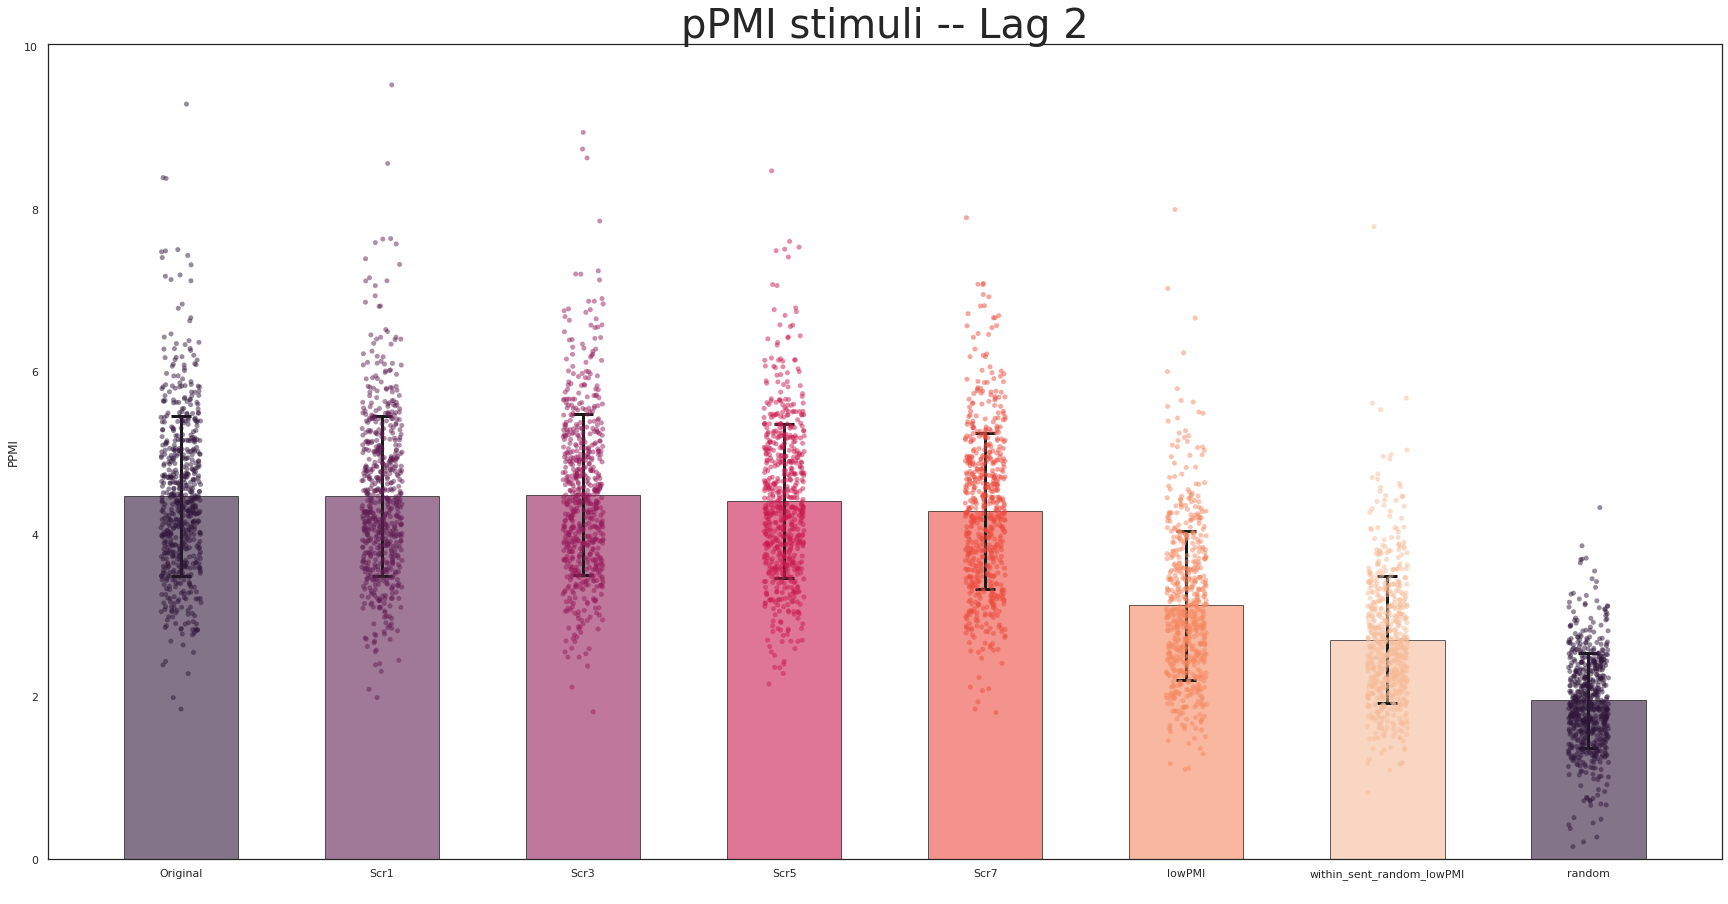

In [9]:
#customize this block for each dataset
N = 1
index = np.arange(N)   
data_title='pPMI stimuli -- Lag 2'

fig_dims=(30,15)
fig, ax = plt.subplots(figsize=fig_dims)
capsize = 10

SMALL_SIZE = 30/2
MEDIUM_SIZE = 40/2
BIGGER_SIZE = 100/2

title_size=80/2

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

sns.stripplot(x="condition", y="pPMI_lag2",data=data,alpha=0.5,palette = mypalette,dodge=True,ax=ax,jitter=0.1)
#space = np.linspace(-len(conditions)/2,len(conditions)/2,len(conditions))
width = (1/float(len(conditions)/6))/1.32
bar_ind = np.arange(len(conditions))
for ind, ppmi in enumerate(ppmi_mean):
    p1 = ax.bar(bar_ind[ind], ppmi, width, edgecolor='black',yerr=ppmi_mean_errors[ind],
                error_kw=dict(lw=3, capsize=capsize, capthick=3), alpha = 0.6)

ax.set(ylabel='PPMI',xlabel=' ')
ax.set_title(data_title, fontsize=title_size) # Add the text/suptitle to figure

plt.savefig('ppmi_fig/including_10rand_ppmi_lag2.png', bbox_inches='tight')

# T-test

In [10]:
from scipy.stats import ttest_ind

cat1 = data[data['condition']=='Scr7']
cat2 = data[data['condition']=='lowPMI']

ttest_ind(cat1['pPMI_lag2'], cat2['pPMI_lag2'])

Ttest_indResult(statistic=21.757525027592397, pvalue=2.7660837766466872e-89)

The larger the t score, the more difference there is between groups. The smaller the t score, the more similarity there is between groups. A t score of 3 means that the groups are three times as different from each other as they are within each other. 

In [11]:
#!pip3 install scikit_posthocs

In [12]:
import scipy.stats as stats
import scikit_posthocs as sp

['Original', 'Scr1', 'Scr3', 'Scr5', 'Scr7', 'lowPMI', 'within_sent_random_lowPMI', 'random']
ANOVA F-statistic and p-value: (396.66475771517696, 0.0)
                           Original  Scr1  Scr3  Scr5  Scr7  lowPMI  \
Original                       -1.0   0.0   0.0   0.0   1.0     1.0   
Scr1                            0.0  -1.0   0.0   0.0   1.0     1.0   
Scr3                            0.0   0.0  -1.0   0.0   1.0     1.0   
Scr5                            0.0   0.0   0.0  -1.0   3.0     1.0   
Scr7                            1.0   1.0   1.0   3.0  -1.0     1.0   
lowPMI                          1.0   1.0   1.0   1.0   1.0    -1.0   
within_sent_random_lowPMI       1.0   1.0   1.0   1.0   1.0     1.0   
random                          1.0   1.0   1.0   1.0   1.0     1.0   

                           within_sent_random_lowPMI  random  
Original                                         1.0     1.0  
Scr1                                             1.0     1.0  
Scr3                

,Original,Scr1,Scr3,Scr5,Scr7,lowPMI,within_sent_random_lowPMI,random
Original,1.000000e+00,9.976352e-01,7.559192e-01,2.688675e-01,6.323822e-04,5.559170e-112,7.547854e-189,0.000000e+00
Scr1,9.976352e-01,1.000000e+00,7.583031e-01,2.678574e-01,6.302939e-04,6.891095e-112,1.123799e-188,0.000000e+00
Scr3,7.559192e-01,7.583031e-01,1.000000e+00,1.563776e-01,2.038850e-04,1.882707e-113,5.109217e-190,0.000000e+00
Scr5,2.688675e-01,2.678574e-01,1.563776e-01,1.000000e+00,1.761408e-02,1.221464e-107,3.520428e-186,0.000000e+00
Scr7,6.323822e-04,6.302939e-04,2.038850e-04,1.761408e-02,1.000000e+00,2.766084e-89,8.146963e-164,9.131432e-313
lowPMI,5.559170e-112,6.891095e-112,1.882707e-113,1.221464e-107,2.766084e-89,1.000000e+00,7.026484e-18,1.503205e-125
within_sent_random_lowPMI,7.547854e-189,1.123799e-188,5.109217e-190,3.520428e-186,8.146963e-164,7.026484e-18,1.000000e+00,7.554079e-72
random,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.131432e-313,1.503205e-125,7.554079e-72,1.000000e+00


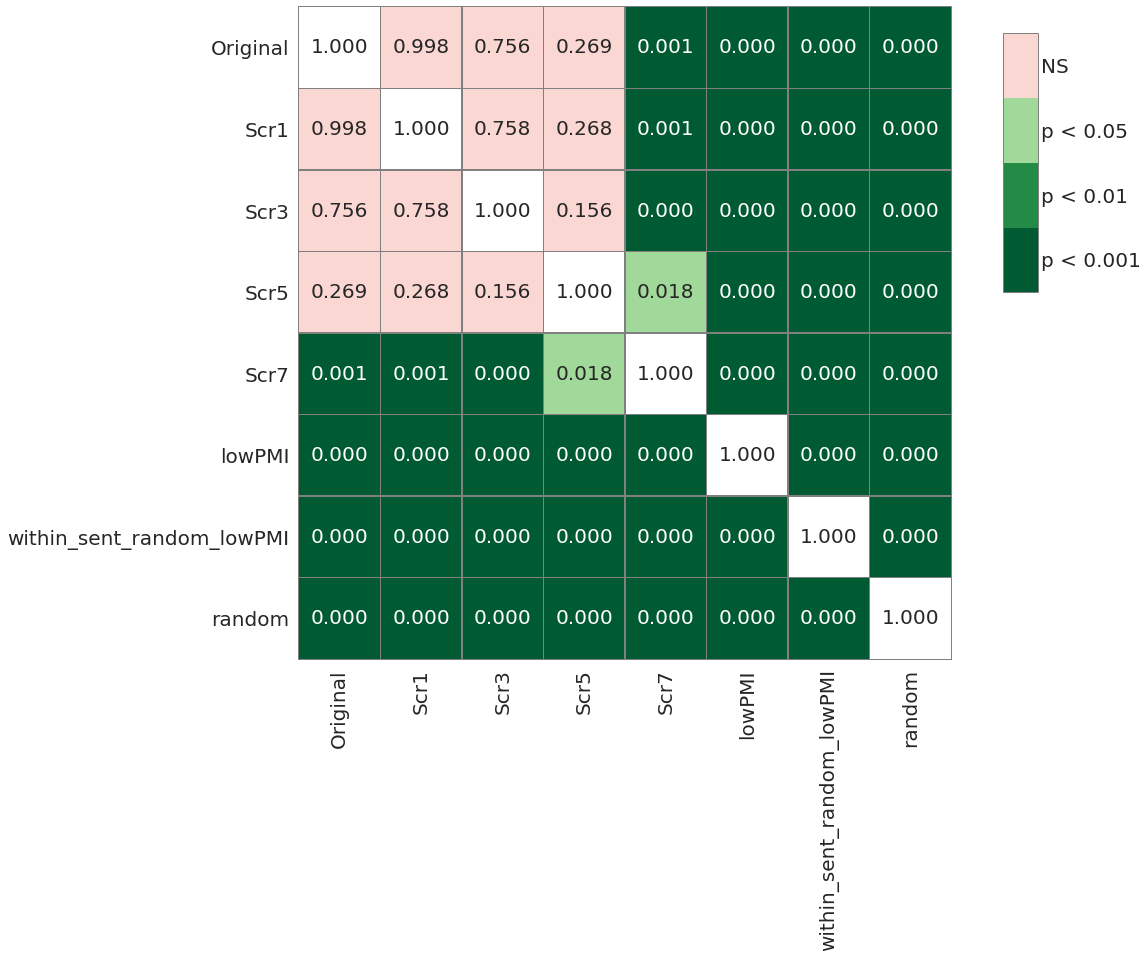

In [13]:
# Plot arguments
#args = {'annot':ttest}
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.95, 0.55, 0.04, 0.3]}

def anova_ttest():
    liste = []
    conditions = ['Original', 'Scr1', 'Scr3', 'Scr5', 'Scr7', 'lowPMI', 'within_sent_random_lowPMI', 'random']
    print(conditions)
    for condition in conditions:
        curr_df = data.loc[data['condition'] == condition]
        cat = np.array(curr_df['pPMI_lag2'])
        liste.append(cat)
    F, p = stats.f_oneway(liste[0],liste[1],liste[2],liste[3],liste[4],liste[5],liste[6])
    print(f'ANOVA F-statistic and p-value: {F,p}')
    
    ttest = sp.posthoc_ttest(data, val_col='pPMI_lag2', group_col='condition')#, p_adjust='fdr_bh')
    plt.figure(figsize=(12,12))
    sp.sign_plot(ttest, annot=ttest, fmt='.3f', **heatmap_args)
    
    plt.savefig('ppmi_fig/ppmi_lag2_stats.png', bbox_inches='tight')

    return ttest
anova_ttest()